In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/MachineLearning/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,1


(array([646.,   2.,  21.,  13.,   5.,  11.,   2.,  20.,  10.,   7.,  10.,
         40.,  11.,   9.,  10.,  13.,  17.,   9.,  11.,  15.,   6.,  16.,
          3.,   8.,  13.,   9.,  32.,   5.,  19.,   1.,   2.,   4.,   2.,
          2.,   4.,   4.,  14.,   7.,   5.,  12.,  11.,  13.,  17.,  19.,
          5.,  10.,   3.,   8.]),
 array([5.55555556e-04, 9.86354167e-01, 1.97215278e+00, 2.95795139e+00,
        3.94375000e+00, 4.92954861e+00, 5.91534722e+00, 6.90114583e+00,
        7.88694444e+00, 8.87274306e+00, 9.85854167e+00, 1.08443403e+01,
        1.18301389e+01, 1.28159375e+01, 1.38017361e+01, 1.47875347e+01,
        1.57733333e+01, 1.67591319e+01, 1.77449306e+01, 1.87307292e+01,
        1.97165278e+01, 2.07023264e+01, 2.16881250e+01, 2.26739236e+01,
        2.36597222e+01, 2.46455208e+01, 2.56313194e+01, 2.66171181e+01,
        2.76029167e+01, 2.85887153e+01, 2.95745139e+01, 3.05603125e+01,
        3.15461111e+01, 3.25319097e+01, 3.35177083e+01, 3.45035069e+01,
        3.54893056e+01

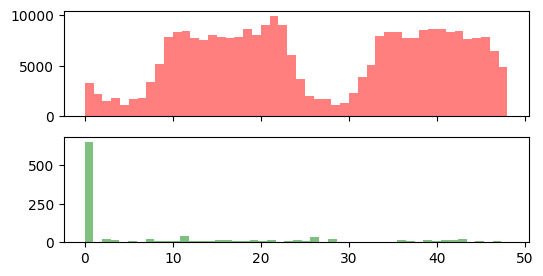

In [3]:
df['Time']=df['Time']/3600
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(6,3))
ax1.hist(df['Time'][df['Class']==0],bins=48,color="red",alpha=0.5)
ax2.hist(df['Time'][df['Class']==1],bins=48,color="green",alpha=0.5)

In [4]:
scaler=StandardScaler()
scaler.fit(df['Amount'].values.reshape(-1,1))
df['Amount']=scaler.transform(df['Amount'].values.reshape(-1,1))
print(df['Amount'])

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64


<ipython-input-5-d8d126d83e75>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df['Class']==0],bins=50,color="red")
<ipython-input-5-d8d126d83e75>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][df['Class']==1],bins=50,color="green")
<ipython-input-5-d8d126d83e75>:4: UserWarnin

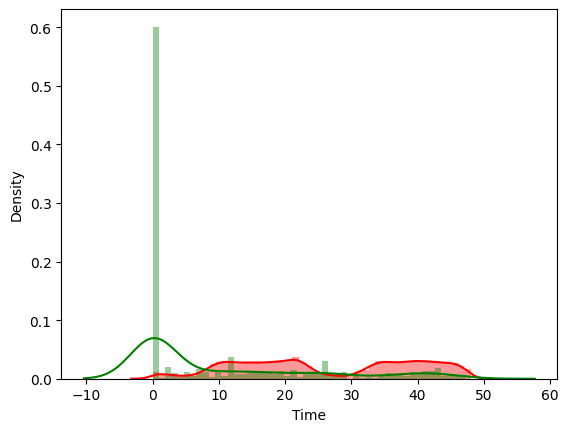

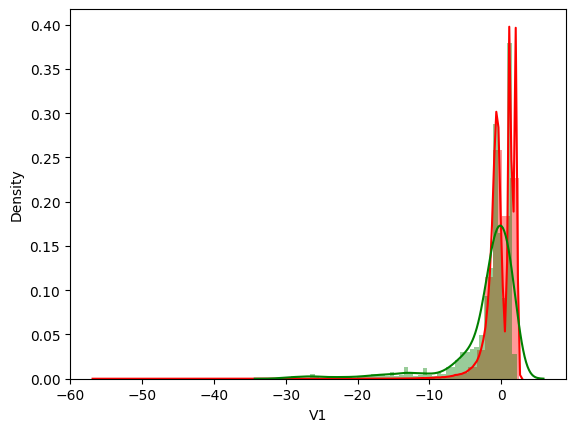

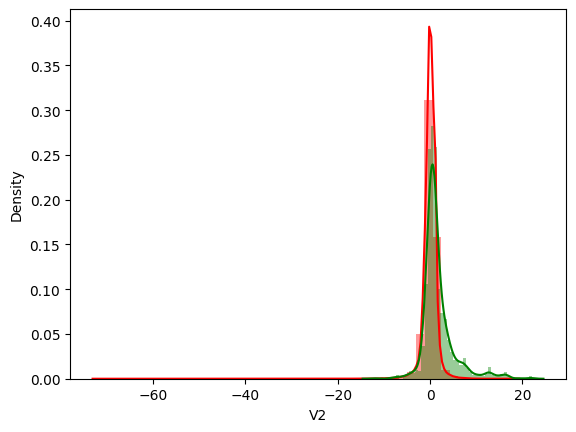

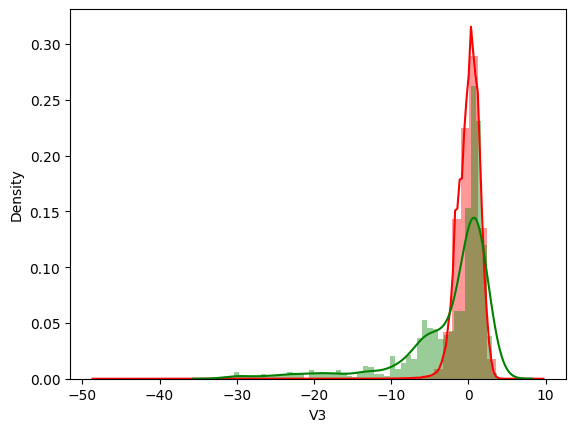

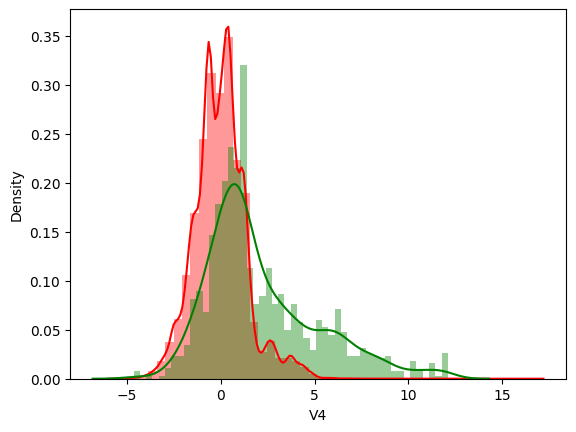

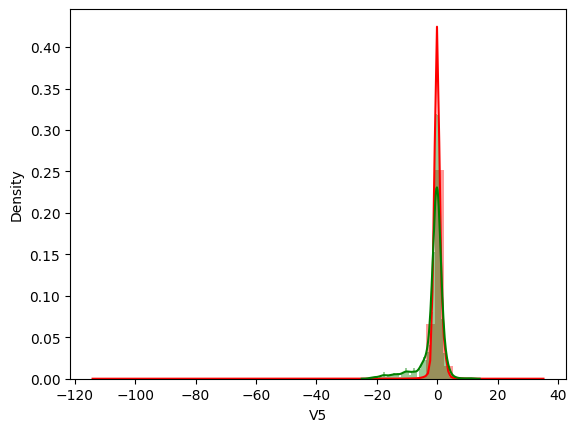

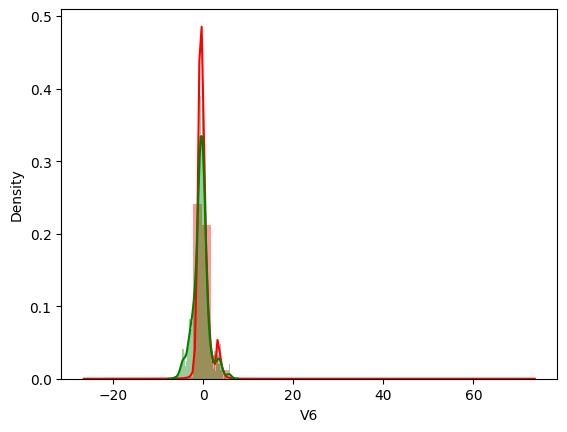

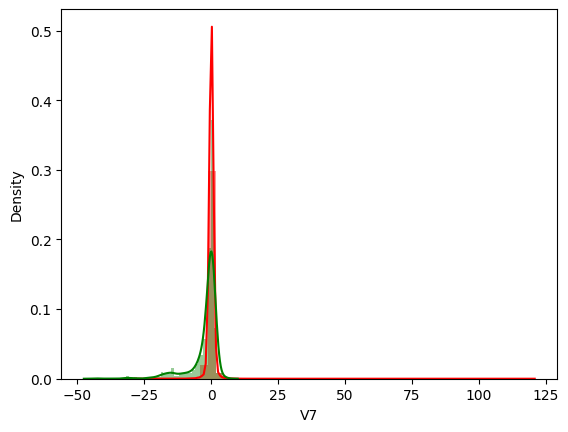

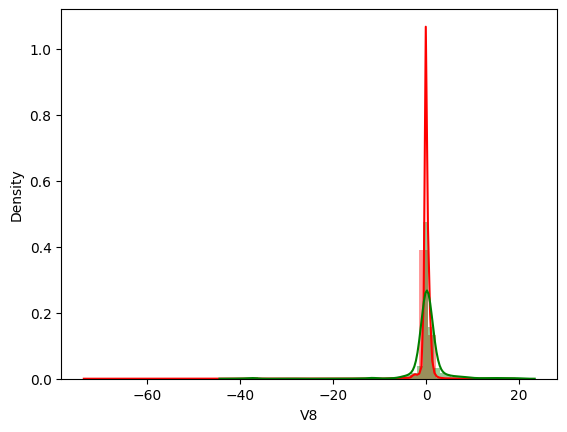

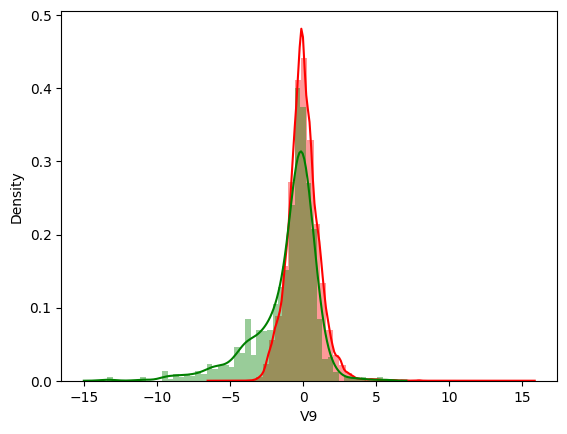

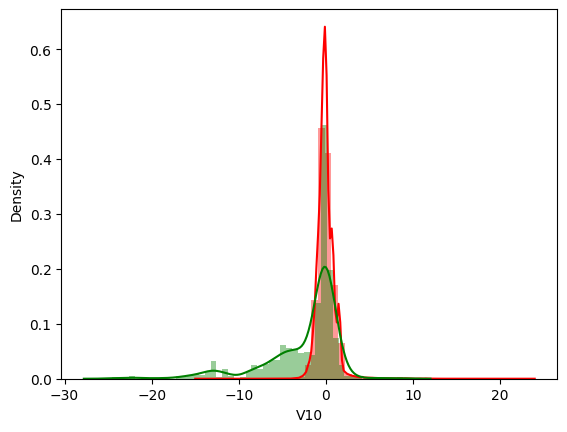

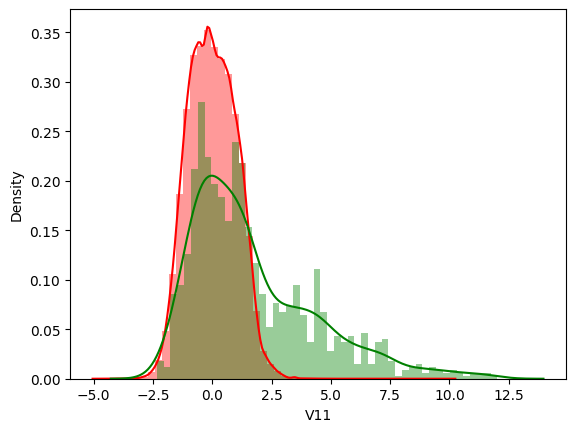

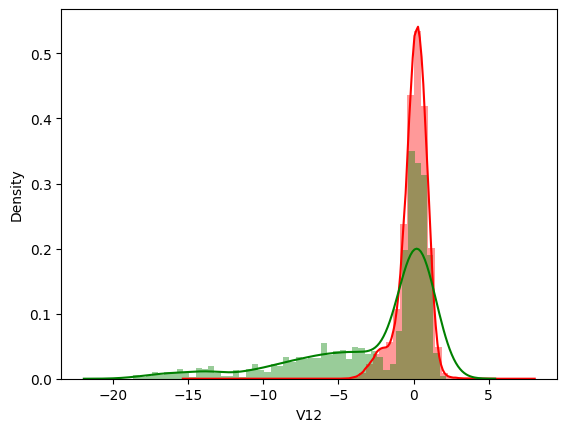

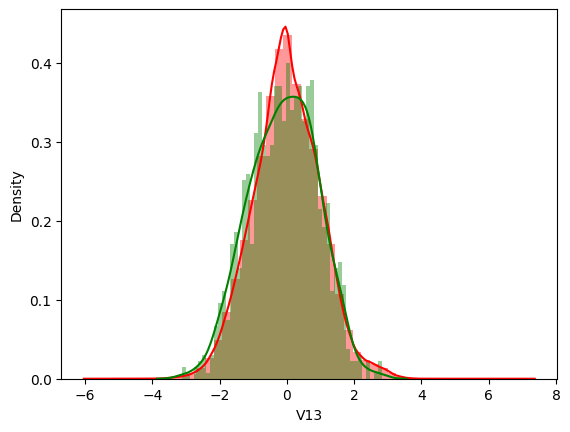

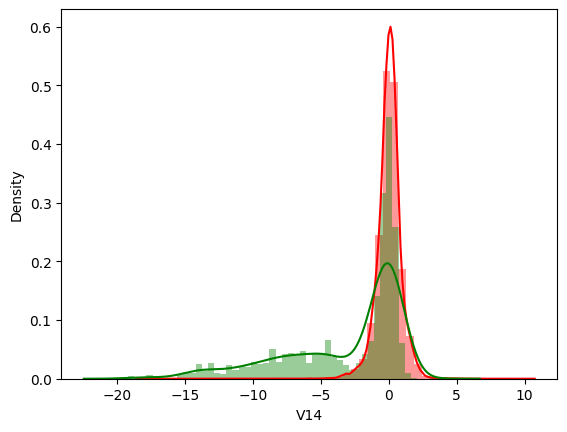

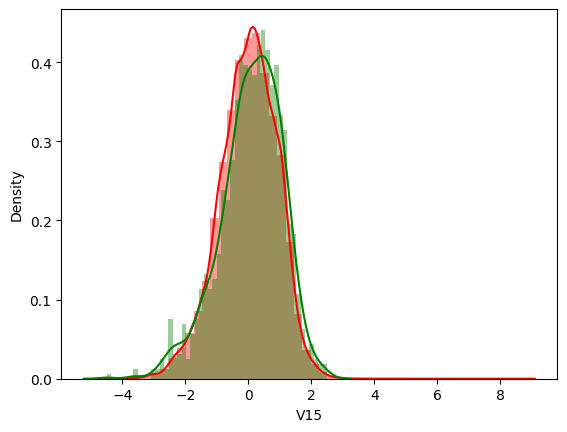

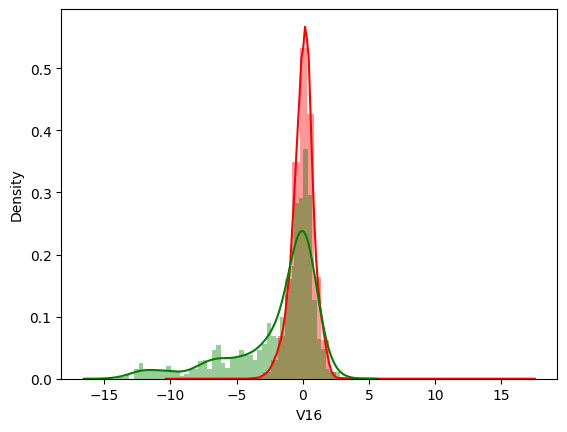

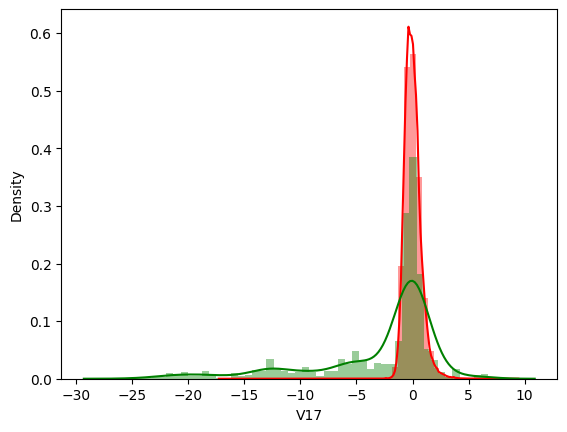

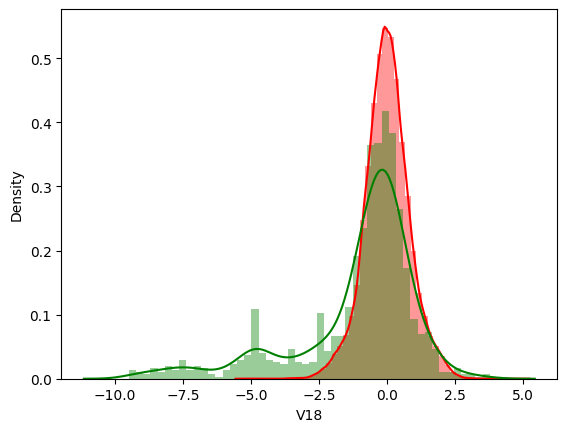

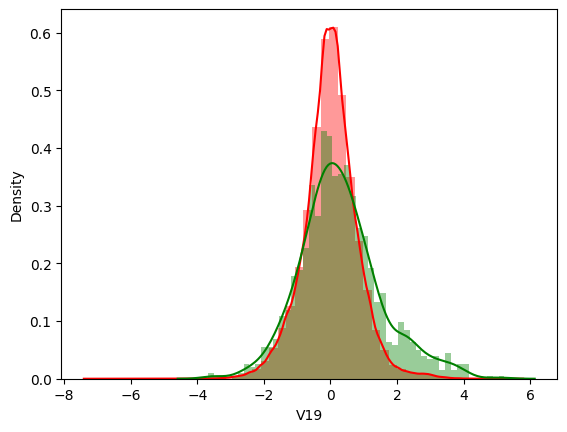

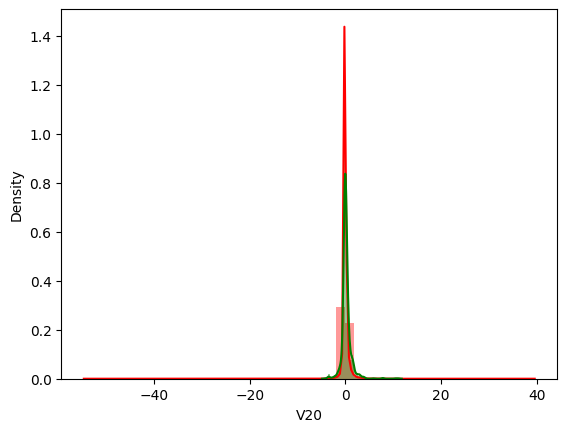

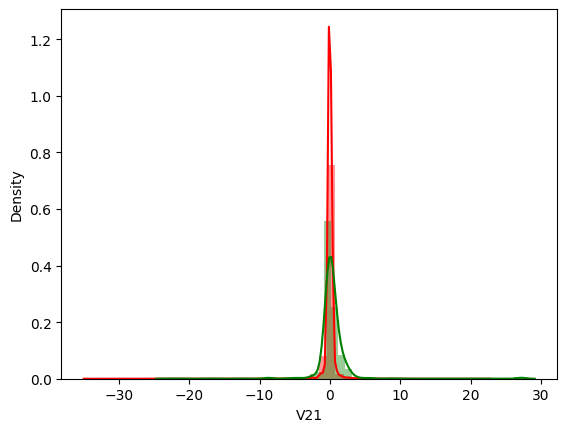

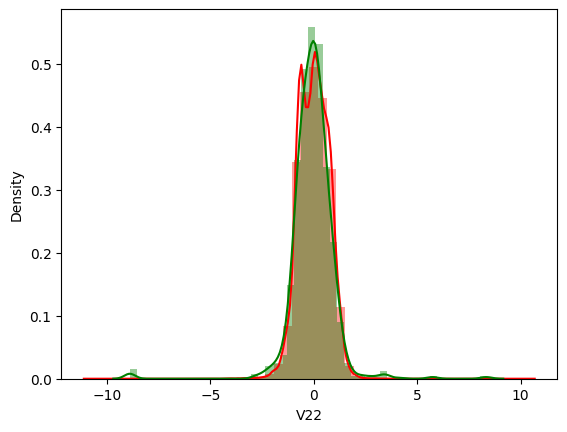

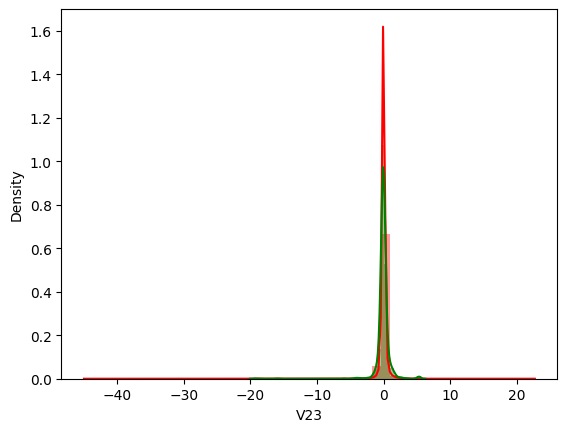

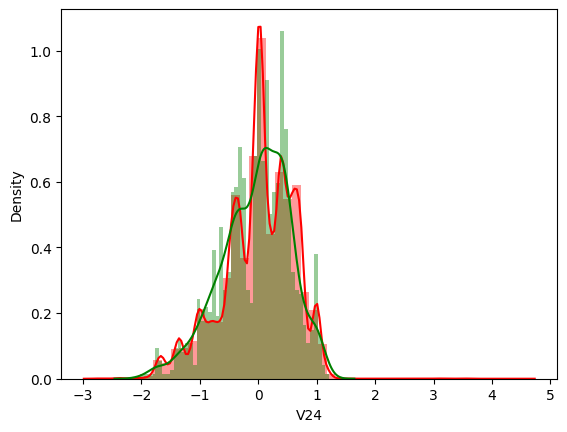

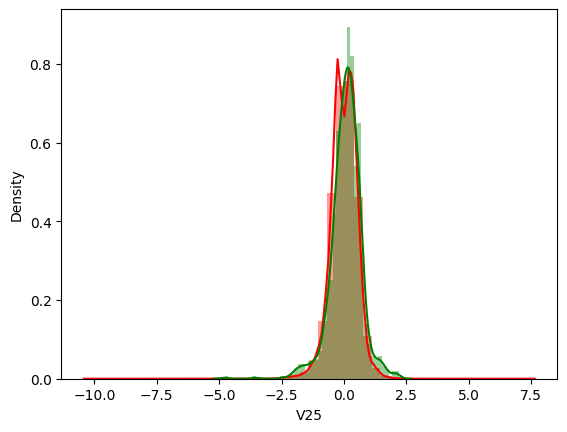

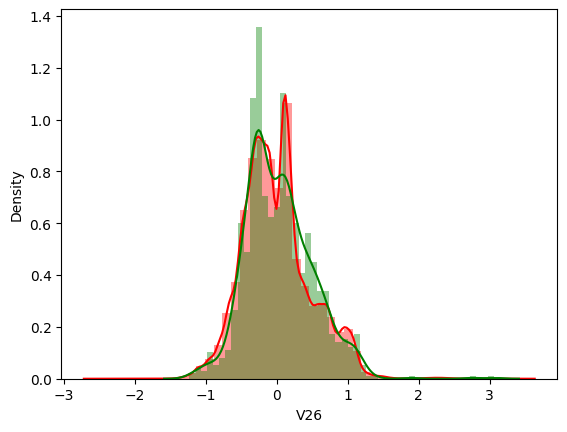

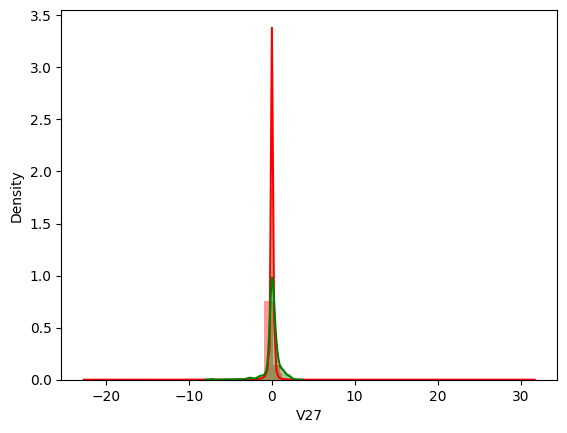

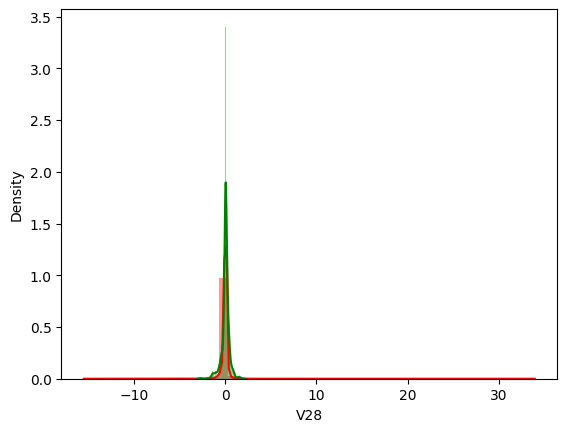

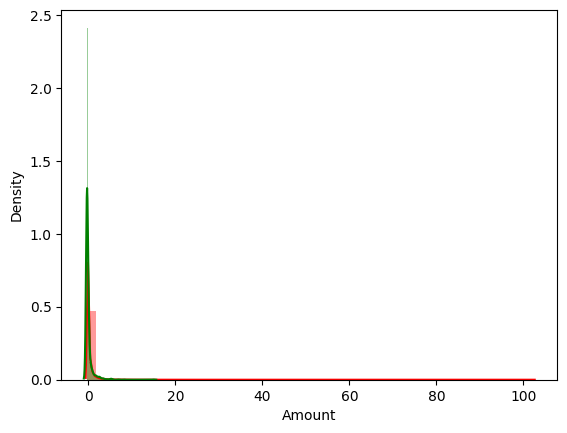

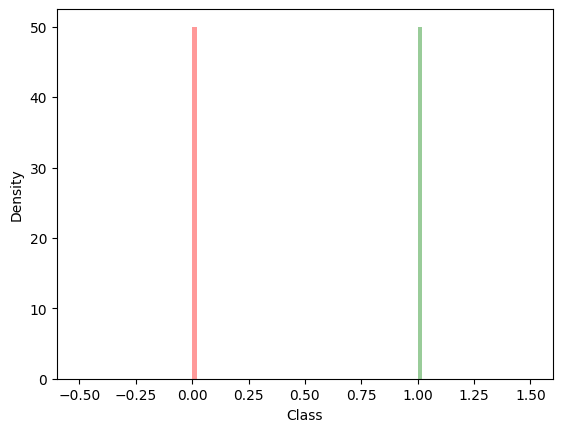

In [5]:
import seaborn as sns
for col in (df.columns):
  fig=plt.figure(col)
  sns.distplot(df[col][df['Class']==0],bins=50,color="red")
  sns.distplot(df[col][df['Class']==1],bins=50,color="green")


In [6]:
def split(drop_list,df):
  df.drop(drop_list,axis=1)
  x=df.drop(['Class'],axis=1)
  y=df['Class']
  x_train,x_test,y_train,y_test=train_test_split(x,y)
  return x_train,x_test,y_train,y_test

In [7]:
def predictions(model,x_train,x_test,y_train,y_test):
  model=model
  model.fit(x_train,y_train)
  train_pred=model.predict(x_train)
  pred=model.predict(x_test)
  print_scores(y_train,y_test,pred,train_pred)

In [8]:
def print_scores(y_train,y_test,pred,train_pred):
  from sklearn.metrics import accuracy_score
  print("Training data accuracy:")
  print(accuracy_score(y_train,train_pred)*100)
  print("Testing data Accuracy:")
  print(accuracy_score(y_test,pred)*100)

In [9]:
drop_list=[]
x_train,x_test,y_train,y_test=split(drop_list,df)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
predictions(model,x_train,x_test,y_train,y_test)

Training data accuracy:
97.15783806558835
Testing data Accuracy:
97.16721440408978


In [10]:
drop_list=['V1','V2','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V25','V26','V27','V28']
x_train,x_test,y_train,y_test=split(drop_list,df)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
predictions(model,x_train,x_test,y_train,y_test)

Training data accuracy:
97.17094637297816
Testing data Accuracy:
97.26833515912475


In [11]:
drop_list=['Time','V1','V2','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V25','V26','V27','V28']
x_train,x_test,y_train,y_test=split(drop_list,df)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
predictions(model,x_train,x_test,y_train,y_test)

Training data accuracy:
97.1723508344842
Testing data Accuracy:
97.13631639560687


In [12]:
drop_list=['V1','V2','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V25','V26','V27','V28','Amount']
x_train,x_test,y_train,y_test=split(drop_list,df)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
predictions(model,x_train,x_test,y_train,y_test)

Training data accuracy:
97.18358652653262
Testing data Accuracy:
97.23603269571079


In [ ]:
drop_list=['Time','V1','V2','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V25','V26','V27','V28','Amount']
x_train,x_test,y_train,y_test=split(drop_list,df)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
predictions(model,x_train,x_test,y_train,y_test)

Training data accuracy:
98.77905479740643
Testing data Accuracy:
98.83008904244262


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearning/creditcard.csv')
df1=pd.DataFrame(df)
print(df1.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [ ]:
scaler=StandardScaler()
df1['Amount']=scaler.fit_transform(df1['Amount'].values.reshape(-1,1))
print(df1['Amount'])

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64


<ipython-input-9-9fd043baa38a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[col][df1['Class']==0],bins=50,color='red')
<ipython-input-9-9fd043baa38a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[col][df1['Class']==0],bins=50,color='green')
<ipython-input-9-9fd043baa38a>:3: UserWa

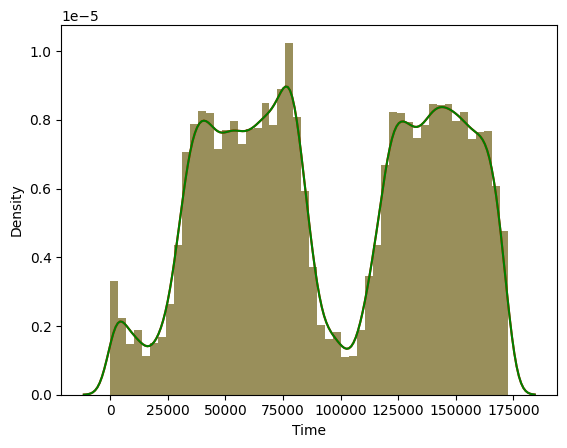

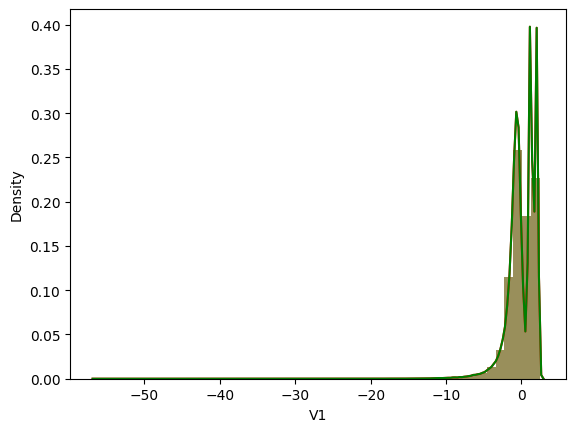

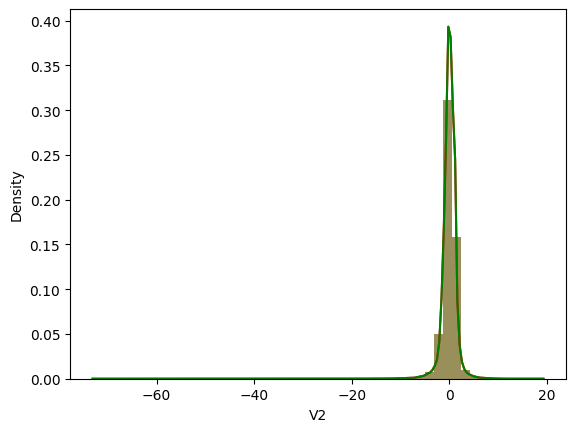

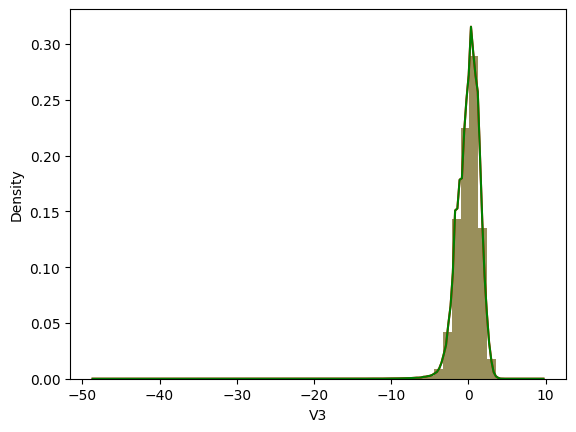

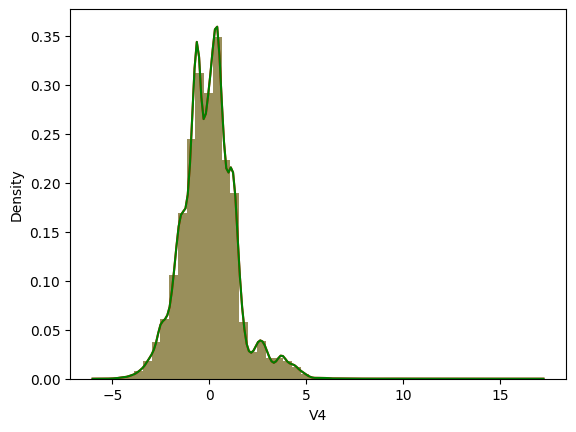

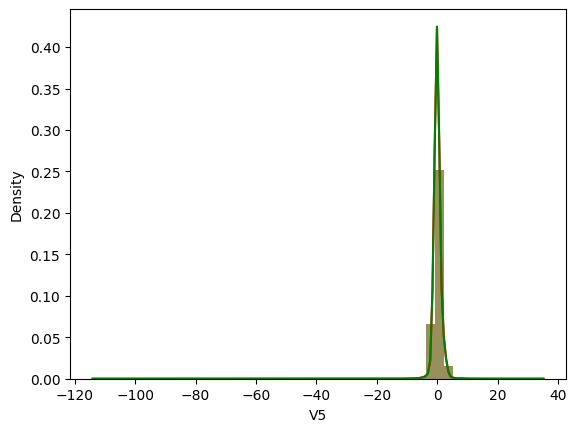

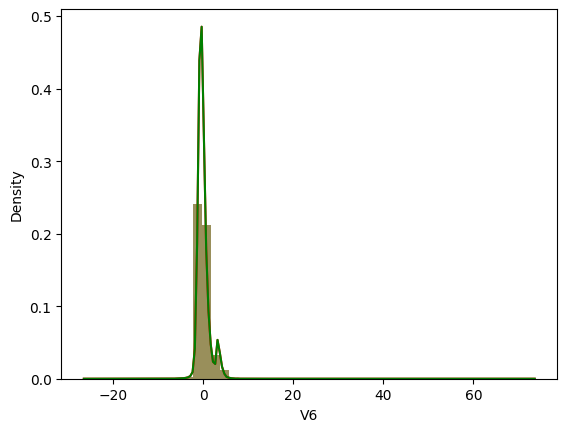

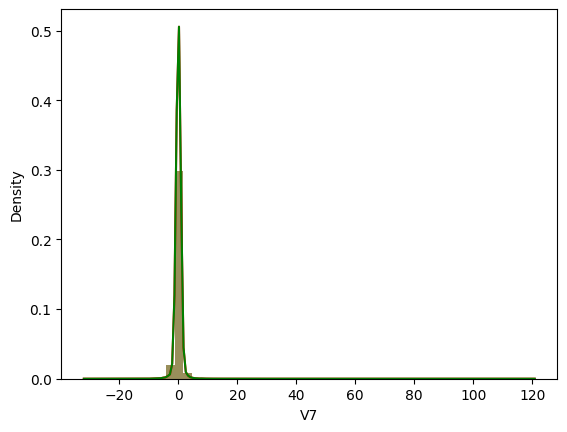

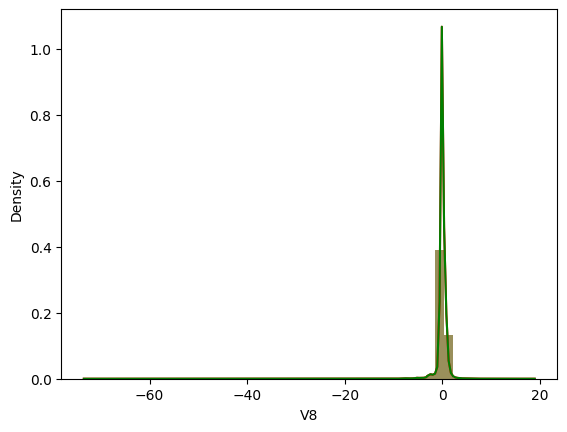

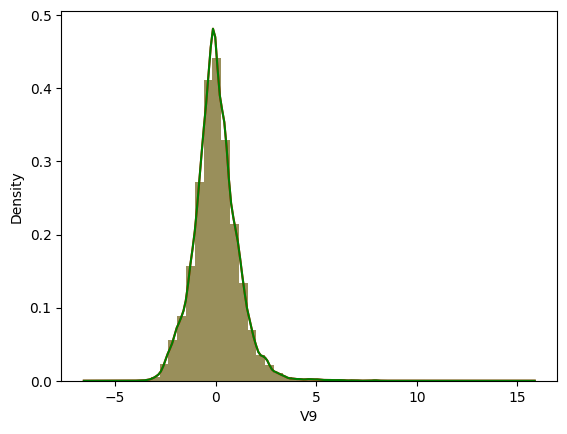

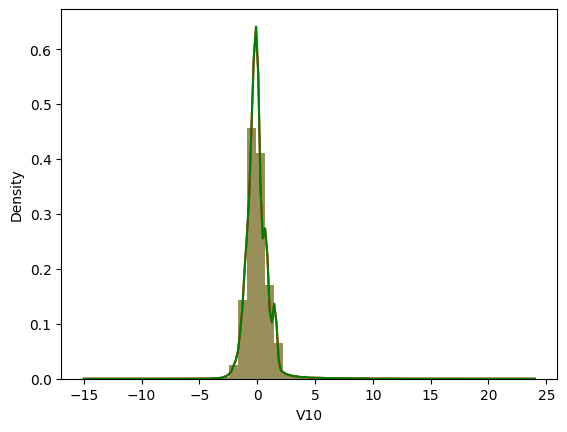

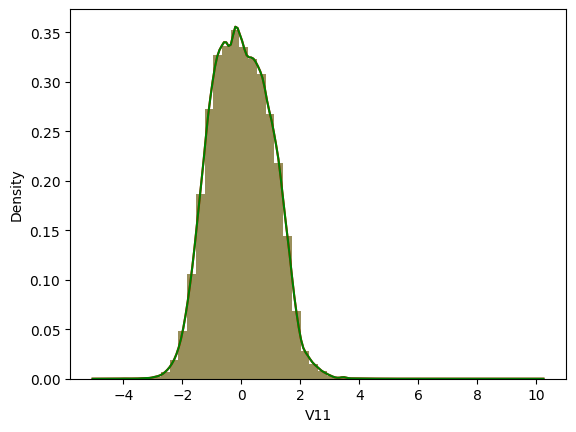

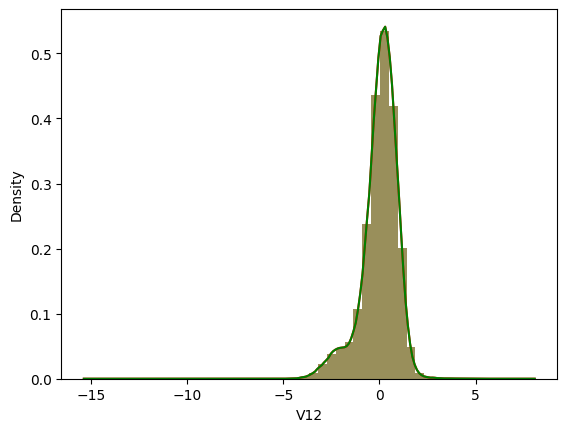

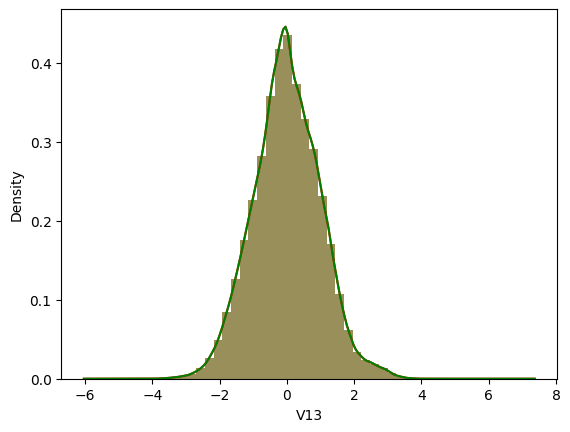

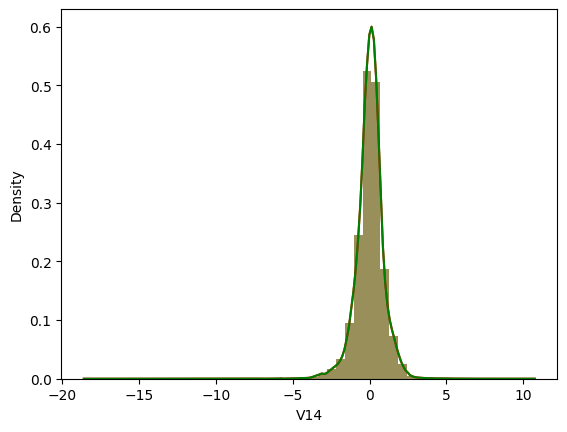

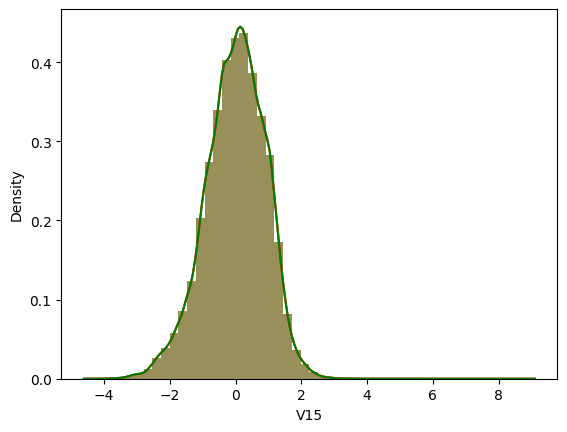

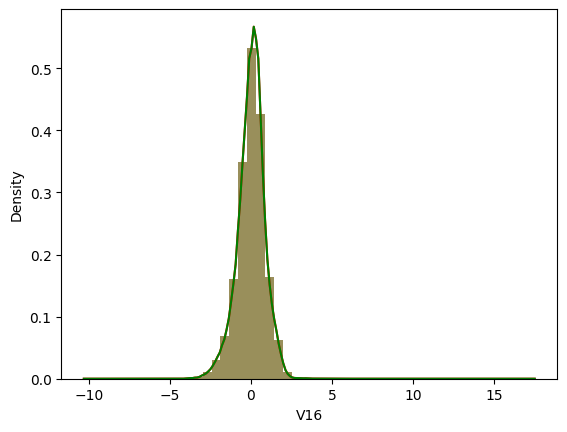

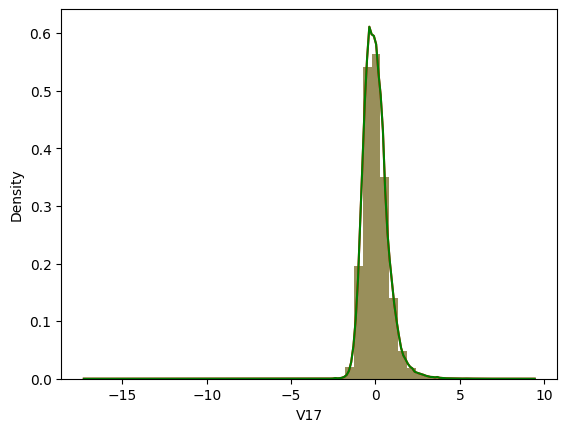

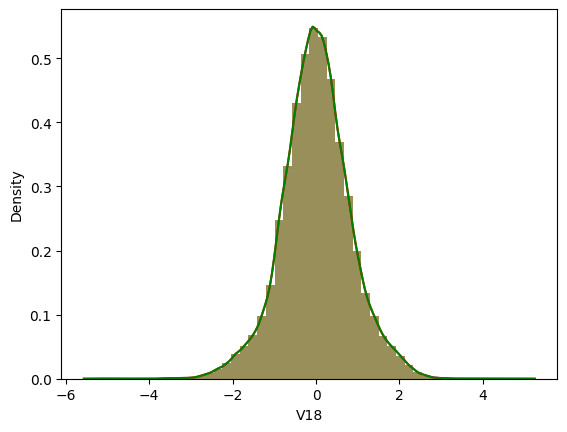

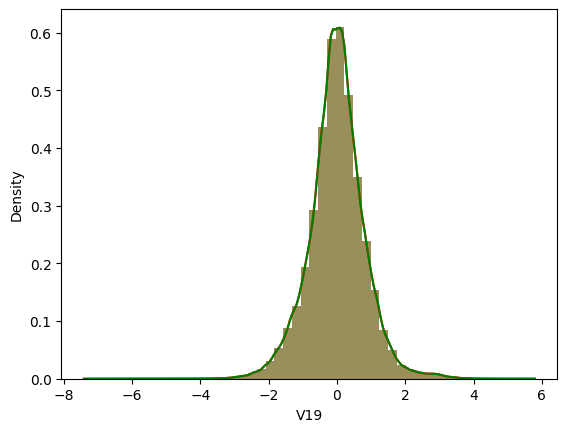

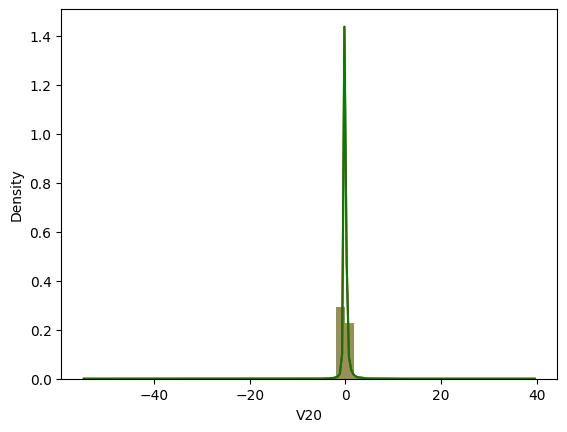

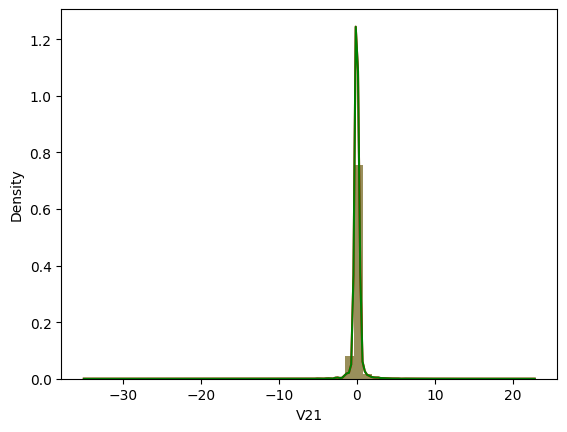

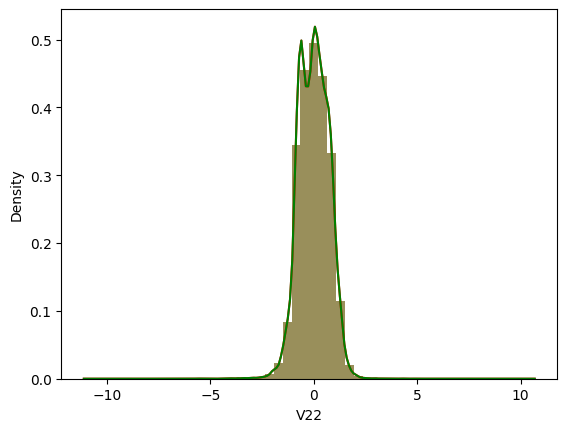

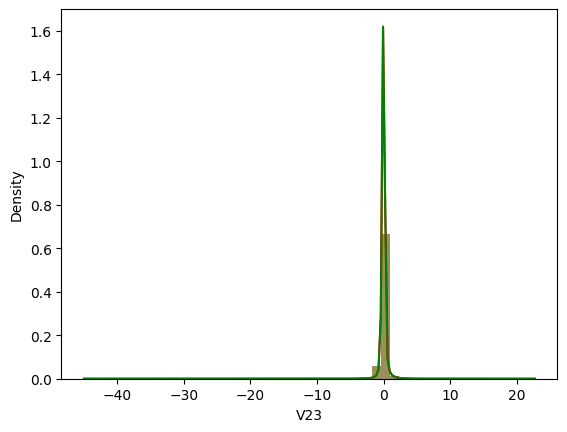

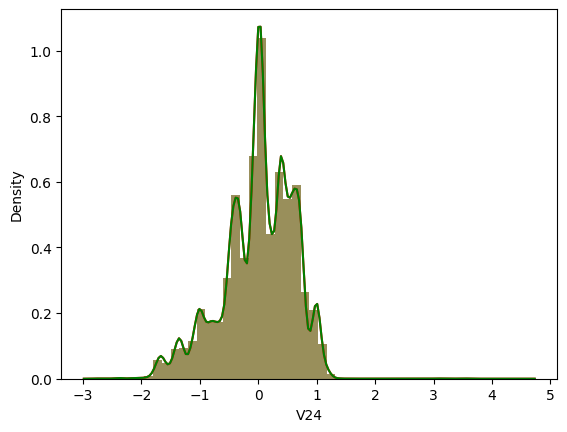

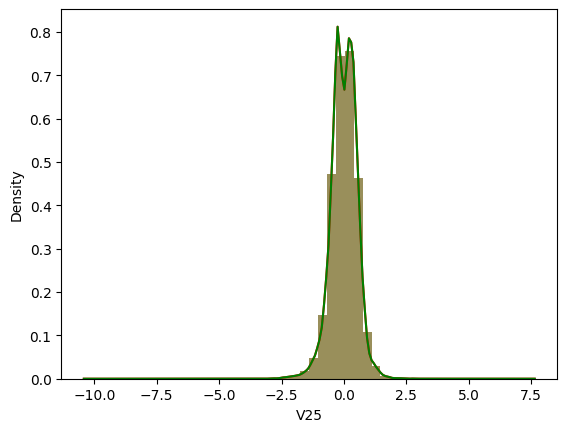

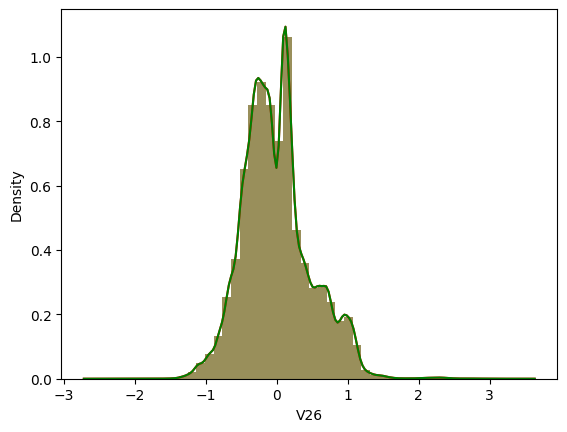

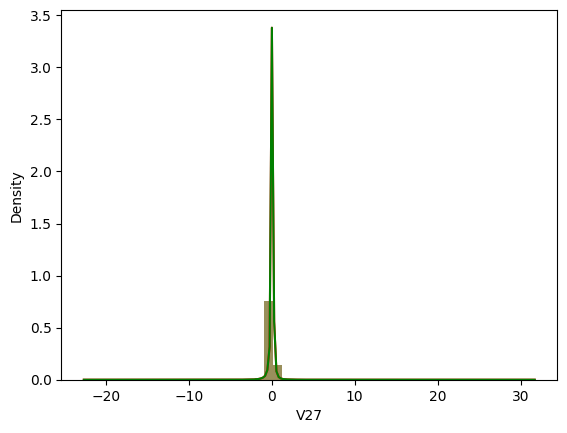

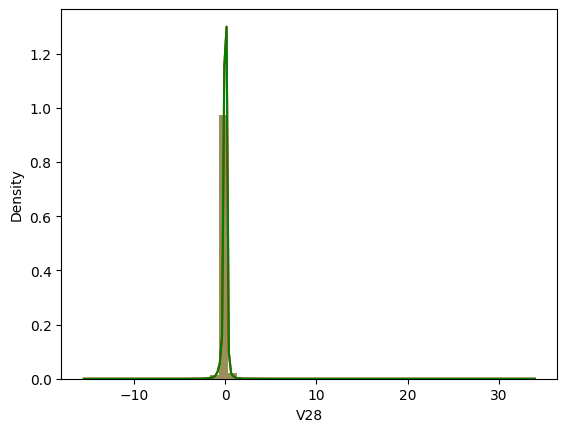

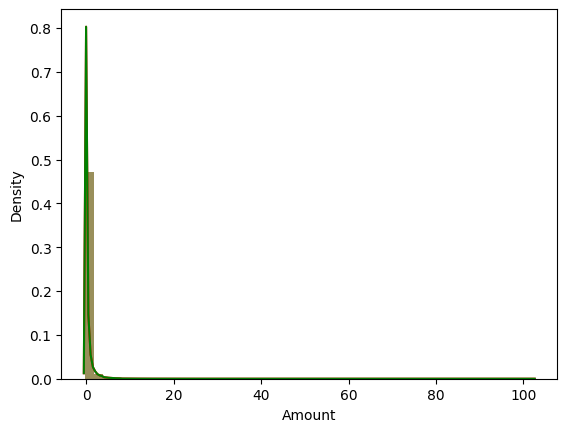

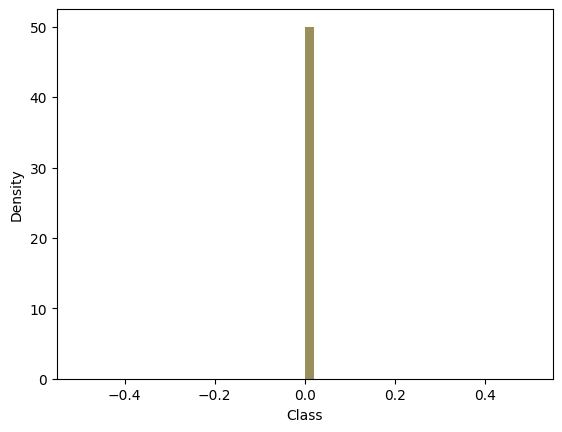

In [ ]:
for col in df1.columns:
  fig=plt.figure(col)
  sns.distplot(df1[col][df1['Class']==0],bins=50,color='red')
  sns.distplot(df1[col][df1['Class']==0],bins=50,color='green')

In [ ]:
def split(drop_list,df1):
  df2=pd.DataFrame(df1.drop(drop_list,axis=1))
  x=df2.drop(['Class'],axis=1)
  y=df2['Class']
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y)
  return x_train,x_test,y_train,y_test
def evaluate(model,x_train,x_test,y_train,y_test):
  model=model
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  result=predictions(y_test,y_pred)*100
  return result
def predictions(y_test,y_pred):
  from sklearn.metrics import accuracy_score
  return accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
drop_list=['Time','V1','V2','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V25','V26','V27','V28','Amount']
x_train,x_test,y_train,y_test=split(drop_list,df1)
res=evaluate(model,x_train,x_test,y_train,y_test)
print(res)

98.38768573916464
